In [1]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = 'drugs_side_effects_drugs_com.csv'
drug_data = pd.read_csv(file_path)

# Displaying the head of the dataframe to understand its structure
print(drug_data.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne a

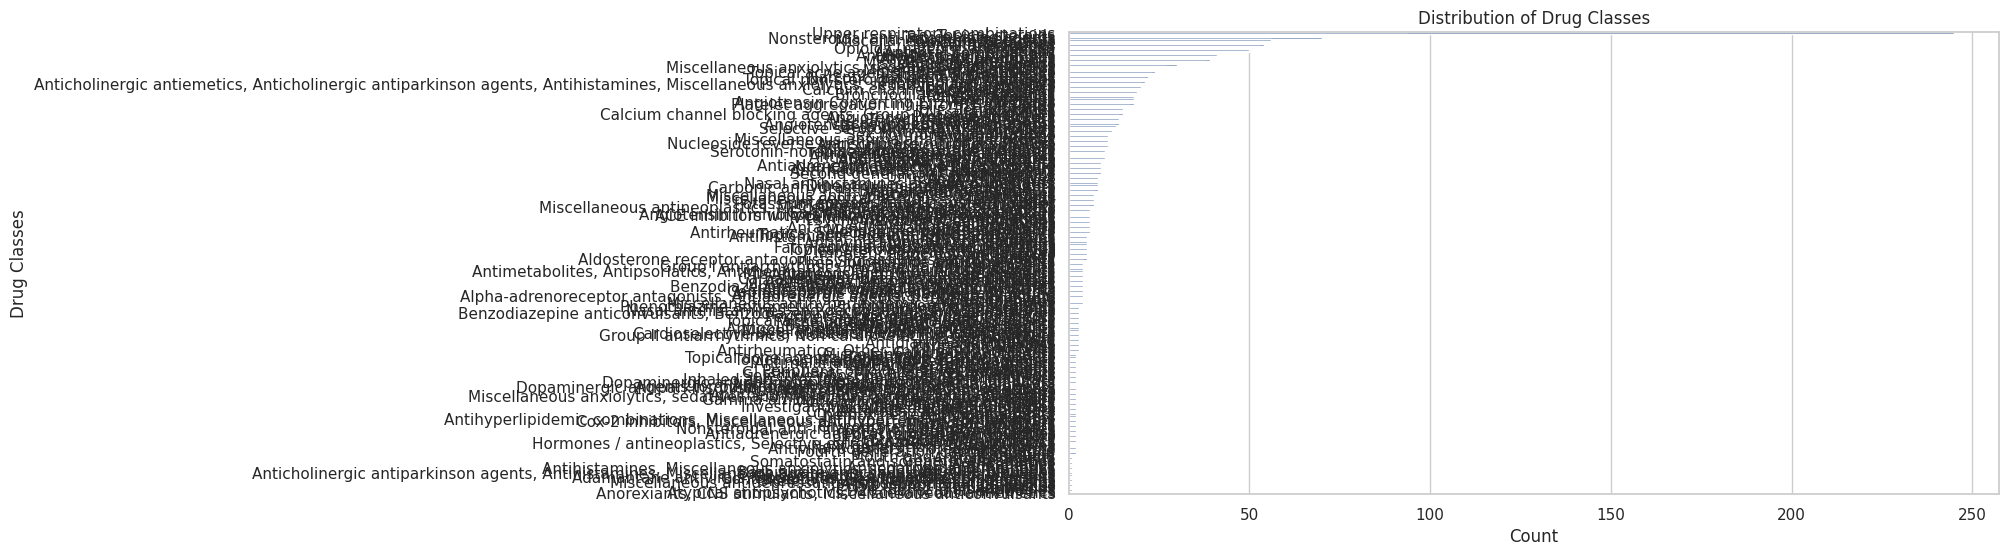

In [2]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style='whitegrid')

# Analyzing the distribution of drug classes
plt.figure(figsize=(12, 6))
sns.countplot(data=drug_data, y='drug_classes', order=drug_data['drug_classes'].value_counts().index)
plt.title('Distribution of Drug Classes')
plt.xlabel('Count')
plt.ylabel('Drug Classes')
plt.show()

<ipython-input-3-bffeb1cb34e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=side_effects_count.values, y=side_effects_count.index, palette='viridis')


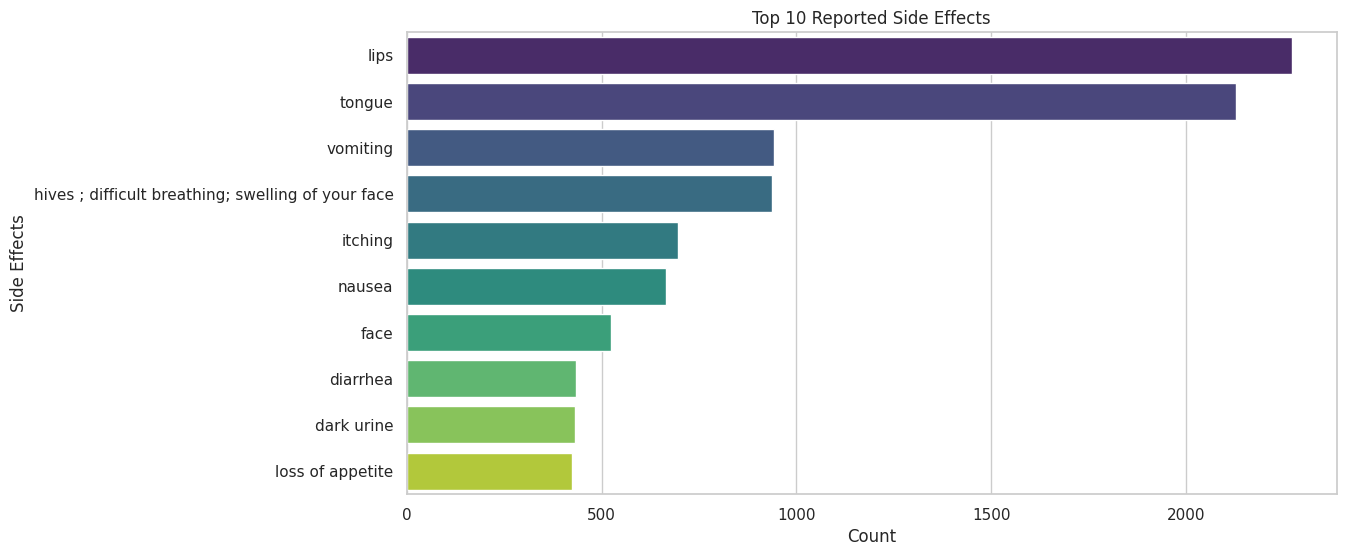

In [3]:
# Extracting and counting the side effects
side_effects_series = drug_data['side_effects'].str.split(',').explode().str.strip()
side_effects_count = side_effects_series.value_counts().head(10)  # Getting the top 10 side effects

# Plotting the top side effects
plt.figure(figsize=(12, 6))
sns.barplot(x=side_effects_count.values, y=side_effects_count.index, palette='viridis')
plt.title('Top 10 Reported Side Effects')
plt.xlabel('Count')
plt.ylabel('Side Effects')
plt.show()

<ipython-input-5-44fd3314371e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=drug_data, x='drug_classes', y='rating', palette='Set2')


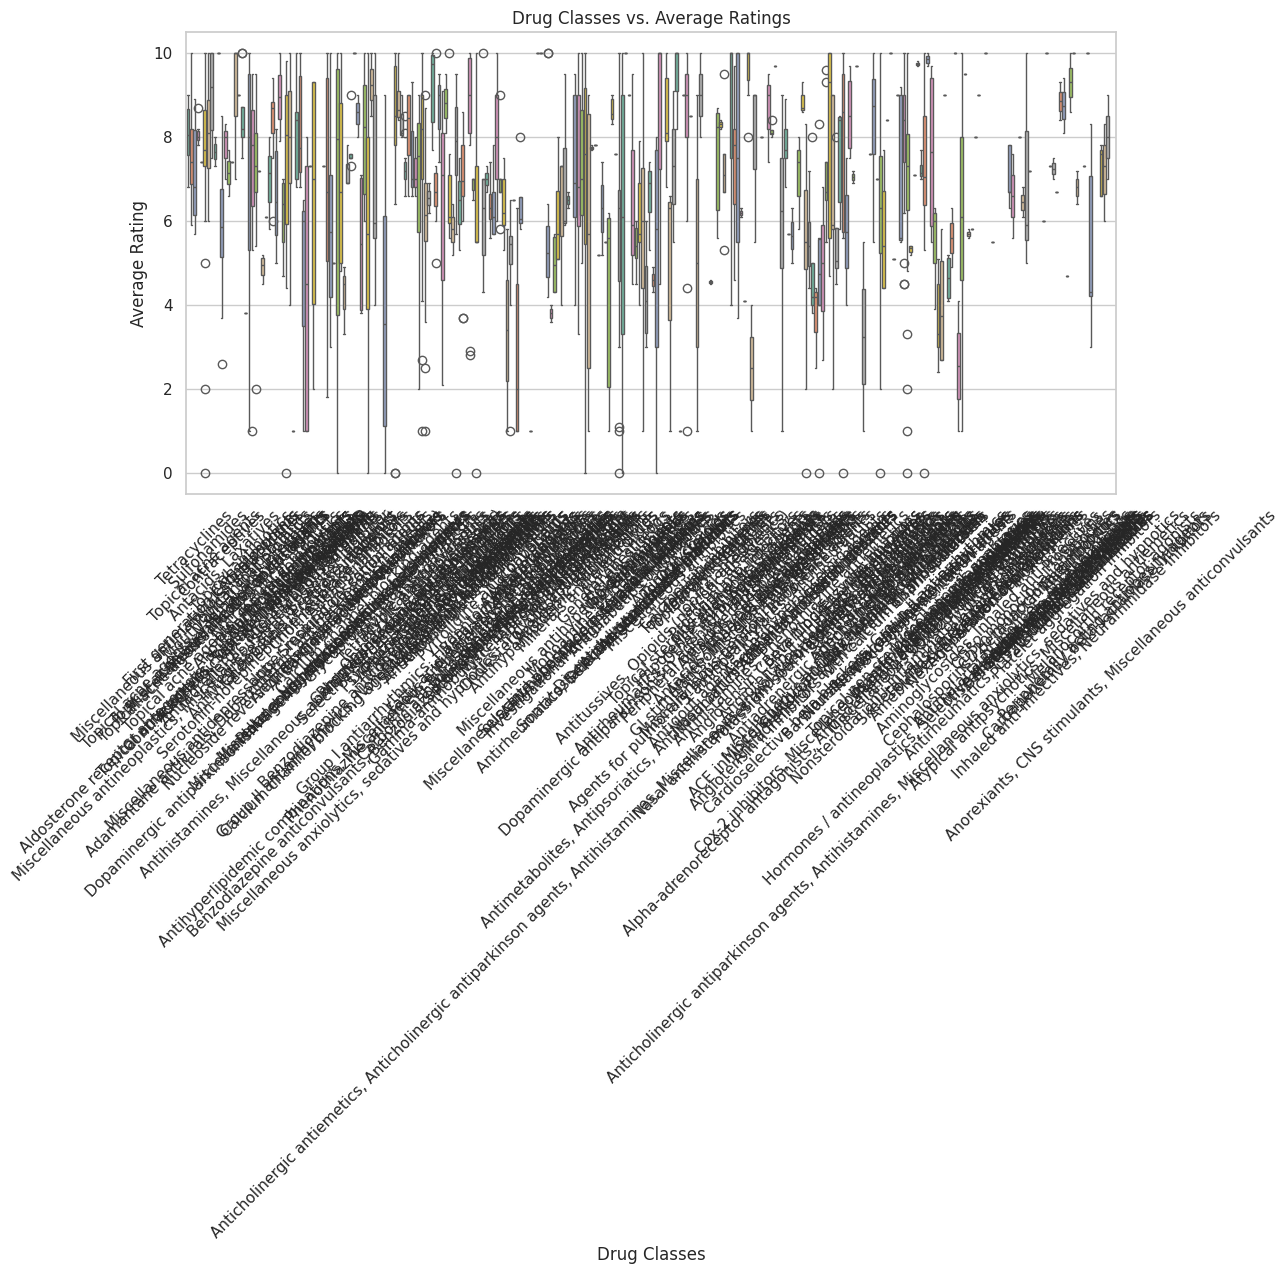

In [5]:
# Converting the rating column to numeric for analysis
# First, we need to handle any non-numeric values that may exist
drug_data['rating'] = pd.to_numeric(drug_data['rating'], errors='coerce')

# Plotting the box plot for drug classes and their ratings
plt.figure(figsize=(12, 6))
sns.boxplot(data=drug_data, x='drug_classes', y='rating', palette='Set2')
plt.title('Drug Classes vs. Average Ratings')
plt.xlabel('Drug Classes')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

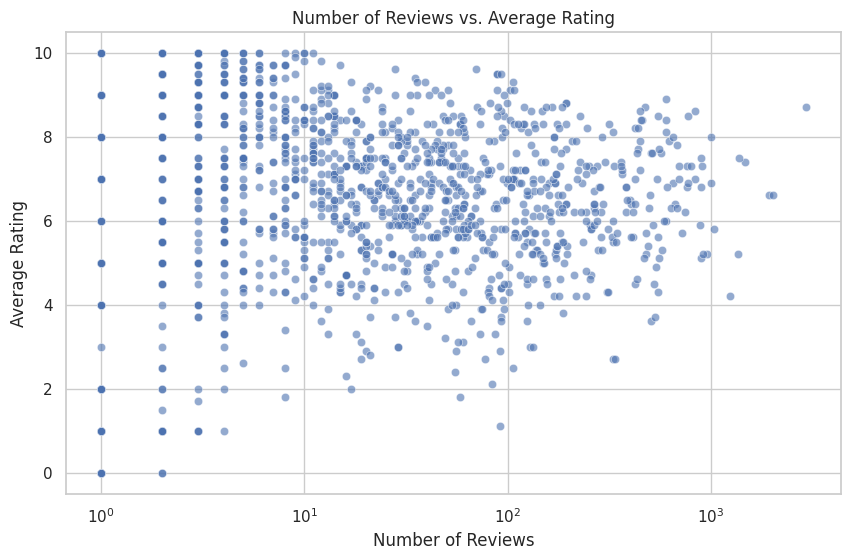

In [6]:
# Let's analyze the relationship between the number of reviews and the average rating of drugs.
# First, we will check the correlation between the number of reviews and ratings.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=drug_data, x='no_of_reviews', y='rating', alpha=0.6)
plt.title('Number of Reviews vs. Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.show()

<ipython-input-7-1debc5b09339>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=drug_data, x='pregnancy_category', order=drug_data['pregnancy_category'].value_counts().index, palette='pastel')


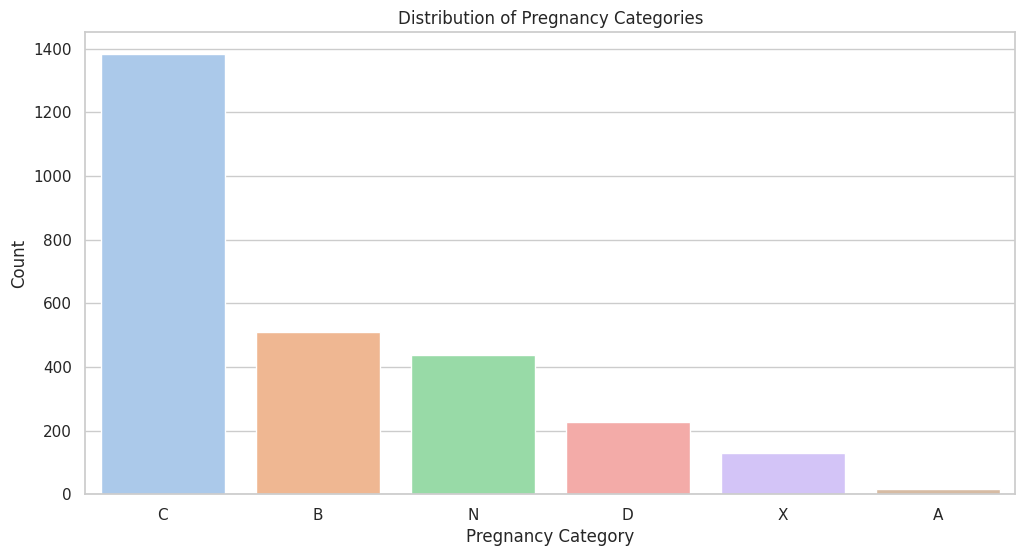

In [7]:
# Plotting the distribution of pregnancy categories
plt.figure(figsize=(12, 6))
sns.countplot(data=drug_data, x='pregnancy_category', order=drug_data['pregnancy_category'].value_counts().index, palette='pastel')
plt.title('Distribution of Pregnancy Categories')
plt.xlabel('Pregnancy Category')
plt.ylabel('Count')
plt.show()

<ipython-input-8-7347d84bcb4d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_side_effects_per_class.values, y=avg_side_effects_per_class.index, palette='magma')


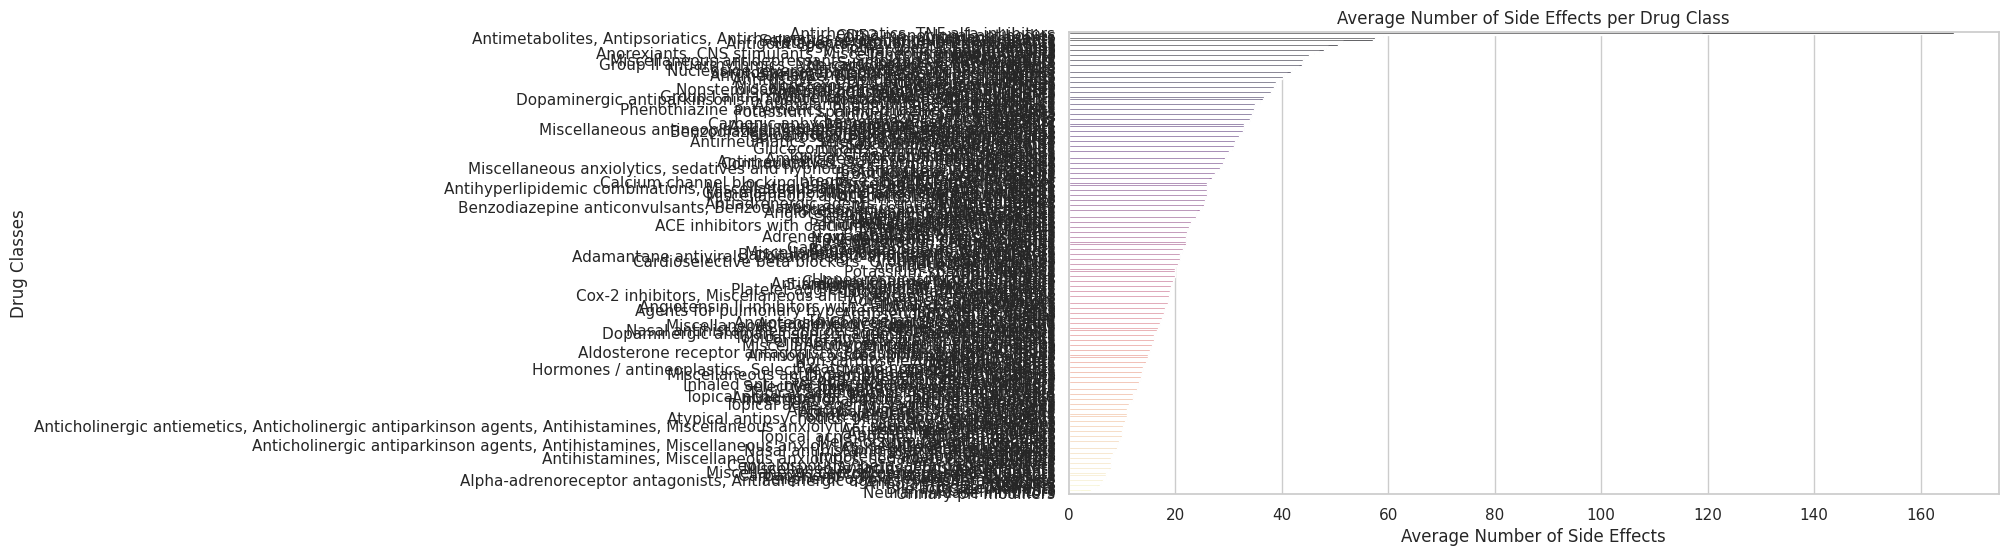

In [8]:
# Calculating the number of side effects for each drug
# First, we need to count the number of side effects for each drug
side_effects_count = drug_data['side_effects'].str.split(',').str.len()
drug_data['num_side_effects'] = side_effects_count

# Grouping by drug classes and calculating the average number of side effects
avg_side_effects_per_class = drug_data.groupby('drug_classes')['num_side_effects'].mean().sort_values(ascending=False)

# Plotting the average number of side effects per drug class
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_side_effects_per_class.values, y=avg_side_effects_per_class.index, palette='magma')
plt.title('Average Number of Side Effects per Drug Class')
plt.xlabel('Average Number of Side Effects')
plt.ylabel('Drug Classes')
plt.show()

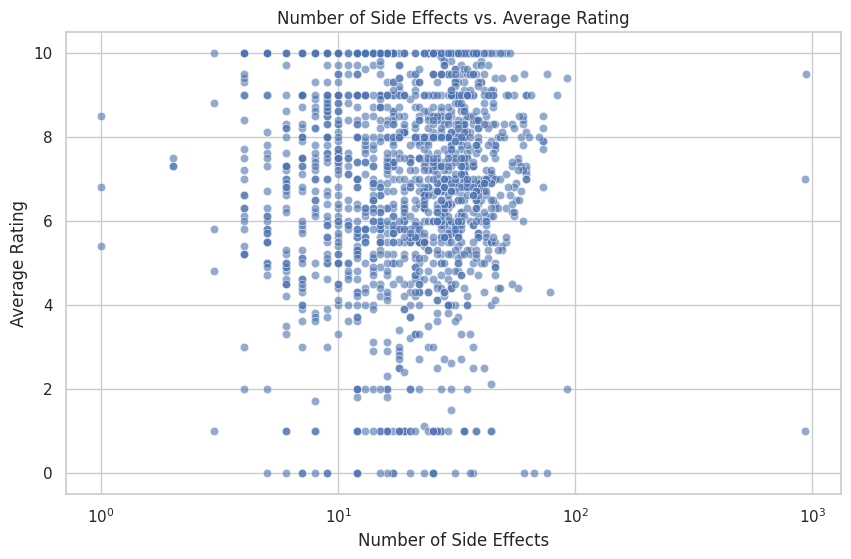

In [9]:
# Plotting the relationship between the number of side effects and average ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=drug_data, x='num_side_effects', y='rating', alpha=0.6)
plt.title('Number of Side Effects vs. Average Rating')
plt.xlabel('Number of Side Effects')
plt.ylabel('Average Rating')
plt.xscale('log')  # Using a logarithmic scale for better visualization
plt.show()

<ipython-input-10-4c81bc157e7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=drug_data, x='medical_condition', y='rating', palette='Set1')


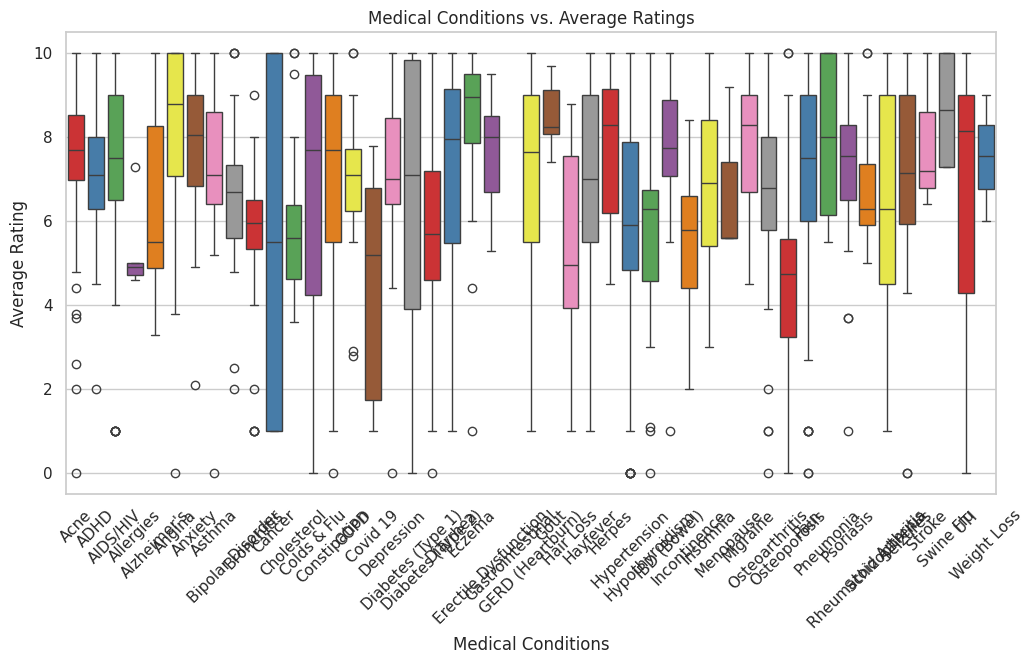

In [10]:
# Plotting the box plot for medical conditions and their ratings
plt.figure(figsize=(12, 6))
sns.boxplot(data=drug_data, x='medical_condition', y='rating', palette='Set1')
plt.title('Medical Conditions vs. Average Ratings')
plt.xlabel('Medical Conditions')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-17b2a8aa4deb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reviews_per_class.values, y=avg_reviews_per_class.index, palette='coolwarm')


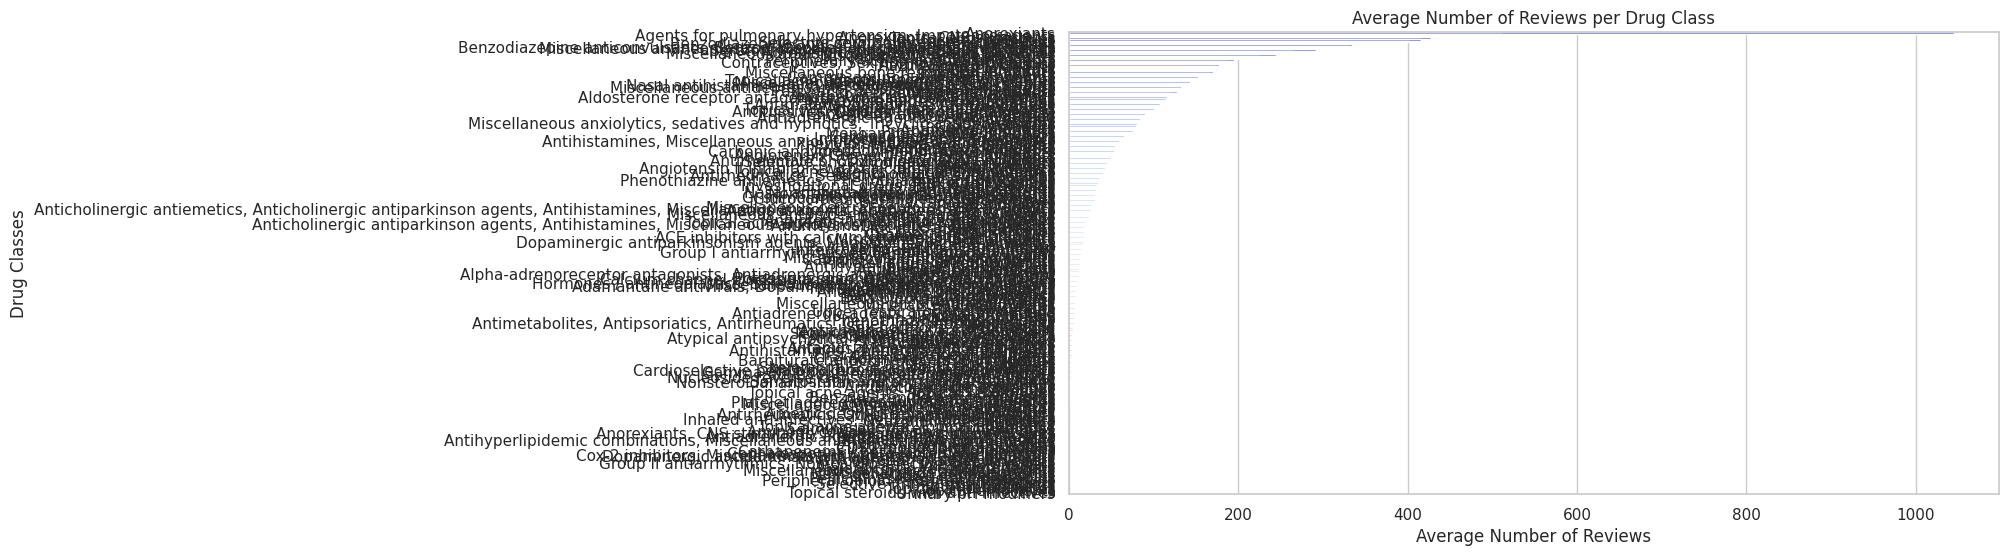

In [11]:
# Grouping by drug classes and calculating the average number of reviews
avg_reviews_per_class = drug_data.groupby('drug_classes')['no_of_reviews'].mean().sort_values(ascending=False)

# Plotting the average number of reviews per drug class
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_reviews_per_class.values, y=avg_reviews_per_class.index, palette='coolwarm')
plt.title('Average Number of Reviews per Drug Class')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Drug Classes')
plt.show()